In [1]:
import matplotlib
matplotlib.use('Agg')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Helpers
import sys
sys.path.insert(0,'../../')
from utils import data_path,results_path,grid_search,estimator_result,cross_validate,rfecv
from scipy.sparse import csr_matrix,save_npz,load_npz
from sklearn.model_selection import cross_val_score,LeaveOneOut,StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
import pickle

# Algorithms
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load data

In [3]:
with open('../' + data_path + 'sorted_TCRs_ind.pkl', 'rb') as f:
    TCRs_ind = pickle.load(f)

In [6]:
train_X = load_npz('../'+data_path + 'version_1/'+ 'train_freq.npz')
test_X = load_npz('../'+data_path + 'version_1/'+ 'test_freq.npz')

train_y = pd.read_csv('../'+data_path + 'train_Y.csv')['CMV_status']
test_y = pd.read_csv('../'+data_path + 'test_Y.csv')['CMV_status']

## RFE

### Top 1000

In [7]:
top_1000 = TCRs_ind[:1000]
# Define a classifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=31, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=5,
        min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
print(rf)

rfecv = RFECV(rf,cv=StratifiedKFold(10),scoring='roc_auc',step = 0.1)
rfecv.fit(train_X[:,top_1000],train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

print('AUROC:',roc_auc_score(test_y,rfecv.predict_proba(test_X[:,top_1000])[:,1]),'Accuracy: ',accuracy_score(test_y,
        rfecv.predict(test_X[:,top_1000])))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
Optimal number of features : 1000
AUROC: 0.8894572321682296 Accuracy:  0.7583333333333333


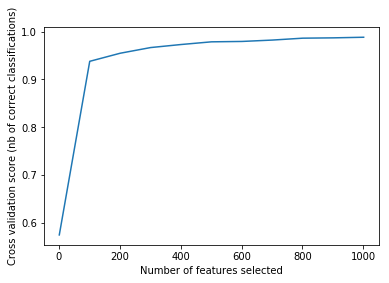

In [8]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,(len(rfecv.grid_scores_))*100,100), rfecv.grid_scores_)

### Top 600

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
Optimal number of features : 600
AUROC: 0.8849104859335037 Accuracy:  0.7916666666666666


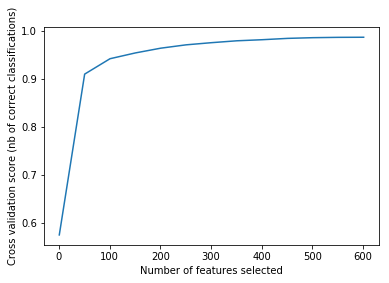

In [9]:
top_600 = TCRs_ind[:600]
# Define a classifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=31, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=5,
        min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
print(rf)

rfecv = RFECV(rf,cv=StratifiedKFold(10),scoring='roc_auc',step = 50)
rfecv.fit(train_X[:,top_600],train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

print('AUROC:',roc_auc_score(test_y,rfecv.predict_proba(test_X[:,top_600])[:,1]),'Accuracy: ',accuracy_score(test_y,
        rfecv.predict(test_X[:,top_600])))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,(len(rfecv.grid_scores_))*50,50), rfecv.grid_scores_)

### Top 350

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
Optimal number of features : 350
AUROC: 0.899971582836033 Accuracy:  0.7916666666666666


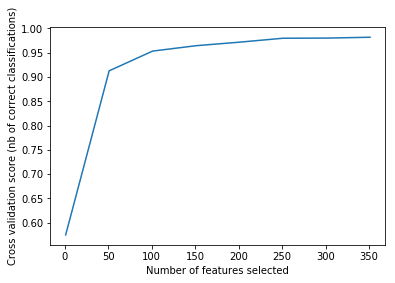

In [10]:
top_350 = TCRs_ind[:350]
# Define a classifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=31, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=5,
        min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
print(rf)

rfecv = RFECV(rf,cv=StratifiedKFold(10),scoring='roc_auc',step = 50)
rfecv.fit(train_X[:,top_350],train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

print('AUROC:',roc_auc_score(test_y,rfecv.predict_proba(test_X[:,top_350])[:,1]),'Accuracy: ',accuracy_score(test_y,
        rfecv.predict(test_X[:,top_350])))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,(len(rfecv.grid_scores_))*50,50), rfecv.grid_scores_)

### Top 200

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
Optimal number of features : 200
AUROC: 0.910201761864166 Accuracy:  0.8416666666666667


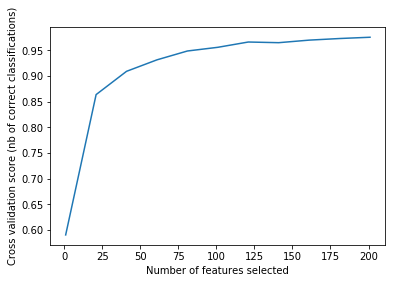

In [11]:
top_200 = TCRs_ind[:200]
# Define a classifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=31, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=5,
        min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
print(rf)

rfecv = RFECV(rf,cv=StratifiedKFold(10),scoring='roc_auc',step = 20)
rfecv.fit(train_X[:,top_200],train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

print('AUROC:',roc_auc_score(test_y,rfecv.predict_proba(test_X[:,top_200])[:,1]),'Accuracy: ',accuracy_score(test_y,
        rfecv.predict(test_X[:,top_200])))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,(len(rfecv.grid_scores_))*20,20), rfecv.grid_scores_)

### Top 165

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
Optimal number of features : 165
AUROC: 0.910201761864166 Accuracy:  0.8333333333333334


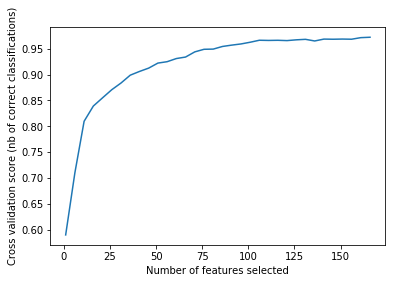

In [13]:
top_165 = TCRs_ind[:165]
# Define a classifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=31, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=5,
        min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
print(rf)

rfecv = RFECV(rf,cv=StratifiedKFold(10),scoring='roc_auc',step = 5)
rfecv.fit(train_X[:,top_165],train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

print('AUROC:',roc_auc_score(test_y,rfecv.predict_proba(test_X[:,top_165])[:,1]),'Accuracy: ',accuracy_score(test_y,
        rfecv.predict(test_X[:,top_165])))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,(len(rfecv.grid_scores_))*5,5), rfecv.grid_scores_)

### Choose Top 200

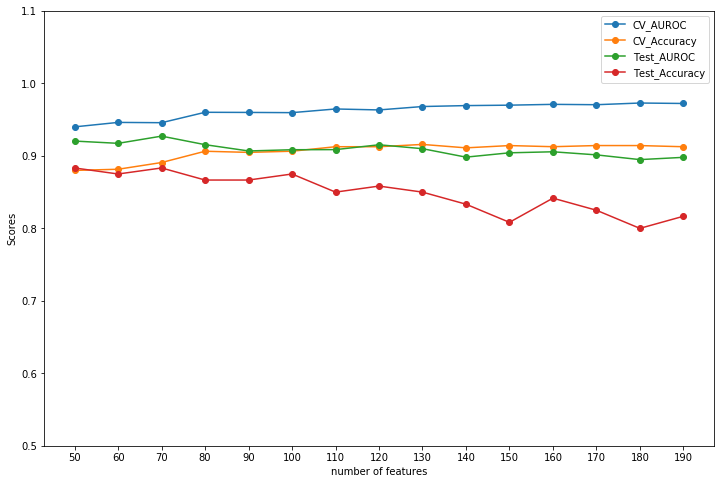

In [17]:
cv_acc = []
cv_auroc = []
test_acc = []
test_auroc = []
for i in range(50,200,10):
    train_X_sub = train_X[:,TCRs_ind[:int(i)]]
    test_X_sub = test_X[:,TCRs_ind[:int(i)]]
    cv_results = cross_validate(rf,train_X_sub,train_y,scoring=('accuracy', 'roc_auc'),cv=StratifiedKFold(10))
    cv_acc.append(np.mean(cv_results['test_accuracy']))
    cv_auroc.append(np.mean(cv_results['test_roc_auc']))

    # fit training set
    rf.fit(X=train_X_sub, y=train_y)

    # predict test_Y
    predict_test = rf.predict(test_X_sub)
    test_acc.append(accuracy_score(test_y, predict_test))

    # AUROC of testing set
    predict_test_prob = rf.predict_proba(test_X_sub)
    pos_prob_test = predict_test_prob[:, 1]
    test_auroc.append(roc_auc_score(test_y, pos_prob_test))
    
    
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
line1 = ax.plot(range(50,200,10),cv_auroc,label='CV_AUROC',marker='o')
line2 = ax.plot(range(50,200,10),cv_acc,label='CV_Accuracy',marker='o')
line3 = ax.plot(range(50,200,10),test_auroc,label='Test_AUROC',marker='o')
line4 = ax.plot(range(50,200,10),test_acc,label='Test_Accuracy',marker='o')

ax.set_ylabel('Scores')
ax.set_xlabel('number of features')
ax.set_xticks(range(50,200,10))
ax.set_yticks(np.arange(0.5,1.1,0.1))
ax.legend(loc='best', bbox_to_anchor=(1,1))

plt.show()

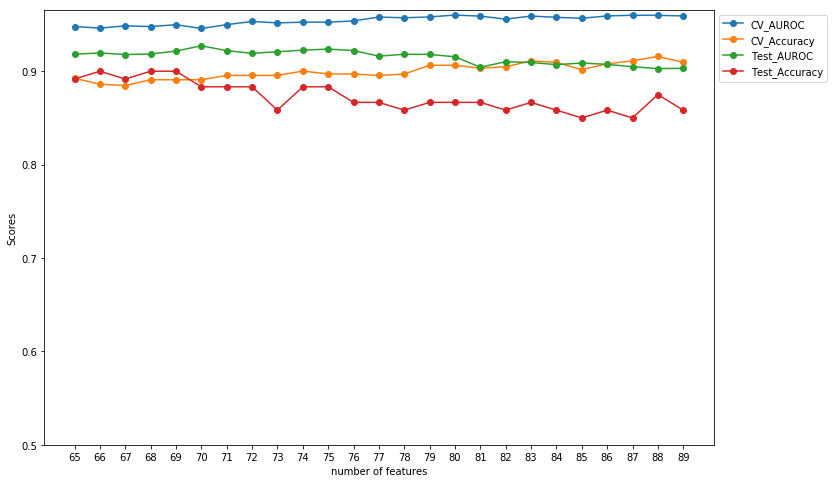

In [22]:
cv_acc = []
cv_auroc = []
test_acc = []
test_auroc = []
for i in range(65,90,1):
    train_X_sub = train_X[:,TCRs_ind[:int(i)]]
    test_X_sub = test_X[:,TCRs_ind[:int(i)]]
    cv_results = cross_validate(rf,train_X_sub,train_y,scoring=('accuracy', 'roc_auc'),cv=StratifiedKFold(10))
    cv_acc.append(np.mean(cv_results['test_accuracy']))
    cv_auroc.append(np.mean(cv_results['test_roc_auc']))

    # fit training set
    rf.fit(X=train_X_sub, y=train_y)

    # predict test_Y
    predict_test = rf.predict(test_X_sub)
    test_acc.append(accuracy_score(test_y, predict_test))

    # AUROC of testing set
    predict_test_prob = rf.predict_proba(test_X_sub)
    pos_prob_test = predict_test_prob[:, 1]
    test_auroc.append(roc_auc_score(test_y, pos_prob_test))
    
    
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
line1 = ax.plot(range(65,90,1),cv_auroc,label='CV_AUROC',marker='o')
line2 = ax.plot(range(65,90,1),cv_acc,label='CV_Accuracy',marker='o')
line3 = ax.plot(range(65,90,1),test_auroc,label='Test_AUROC',marker='o')
line4 = ax.plot(range(65,90,1),test_acc,label='Test_Accuracy',marker='o')

ax.set_ylabel('Scores')
ax.set_xlabel('number of features')
ax.set_xticks(range(65,90,1))
ax.set_yticks(np.arange(0.5,1,0.1))
ax.legend(loc='best', bbox_to_anchor=(1,1))

plt.show()

In [23]:
cv_acc = []
cv_auroc = []
test_acc = []
test_auroc = []
for i in range(65,100,1):
    train_X_sub = train_X[:,TCRs_ind[:int(i)]]
    test_X_sub = test_X[:,TCRs_ind[:int(i)]]
    cv_results = cross_validate(rf,train_X_sub,train_y,scoring=('accuracy', 'roc_auc'),cv=StratifiedKFold(10))
    cv_acc = np.mean(cv_results['test_accuracy'])
    cv_auroc = np.mean(cv_results['test_roc_auc'])

    # fit training set
    rf.fit(X=train_X_sub, y=train_y)

    # predict test_Y
    predict_test = rf.predict(test_X_sub)
    acc = accuracy_score(test_y, predict_test)

    # AUROC of testing set
    predict_test_prob = rf.predict_proba(test_X_sub)
    pos_prob_test = predict_test_prob[:, 1]
    auroc = roc_auc_score(test_y, pos_prob_test)
    
    print(i,':')
    print('cv_auroc:',cv_auroc, 'cv_acc:',cv_acc,'auroc:',auroc, 'acc:',acc)

65 :
cv_auroc: 0.9478811869575416 cv_acc: 0.8924473443223444 auroc: 0.9181585677749361 acc: 0.8916666666666667
66 :
cv_auroc: 0.9461969270466808 cv_acc: 0.886195818070818 auroc: 0.9195794259732878 acc: 0.9
67 :
cv_auroc: 0.9485344827586207 cv_acc: 0.8846092796092796 auroc: 0.9178743961352656 acc: 0.8916666666666667
68 :
cv_auroc: 0.9478155055125498 cv_acc: 0.8908840811965814 auroc: 0.9184427394146063 acc: 0.9
69 :
cv_auroc: 0.94981331613105 cv_acc: 0.8908600427350428 auroc: 0.9215686274509803 acc: 0.9
70 :
cv_auroc: 0.945777816873876 cv_acc: 0.8908360042735044 auroc: 0.9272520602443877 acc: 0.8833333333333333
71 :
cv_auroc: 0.9498727422003285 cv_acc: 0.8954994658119659 auroc: 0.9219948849104859 acc: 0.8833333333333333
72 :
cv_auroc: 0.9532868089764641 cv_acc: 0.8954994658119659 auroc: 0.9191531685137823 acc: 0.8833333333333333
73 :
cv_auroc: 0.951759715380405 cv_acc: 0.8954994658119659 auroc: 0.9208581983518044 acc: 0.8583333333333333
74 :
cv_auroc: 0.9525490656032527 cv_acc: 0.9001636

In [27]:
train_X_sub = train_X[:,TCRs_ind[:69]]
test_X_sub = test_X[:,TCRs_ind[:69]]
estimator_result(rf,train_X_sub,train_y,test_X_sub,test_y)

********************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

Cross validation:
accuracy score 0.8908600427350428
AUROC 0.94981331613105
________________________________________________________________________________
Training set:
accuracy score 0.9578783151326054
AUROC 0.9756605850896509
log-loss: 0.19760241189879663
________________________________________________________________________________
Testing set;
accuracy score: 0.9
AUROC 0.9215686274509803
log-loss: 0.34733212084438053
classification_report
             precision    recall  f1-score   support

          

**Top 69**